### Project Overview 
- The Capital Markets and the Fixed Income Market are inversely coorelated from what you have learned from previous projects. This is an indicator that an Deep/Artificial Neural Network could have strong predicive capabilities for, lets say, the 10 Year Tresaury Maturity Rate. 
- So, for this project you will do just that. We want you to attempt to predict the rate of the 10 year Treasury using the Open of the volatility index along with ProShares Ultra VIX Short-Term Futures ETF  (UVXY)
- Time frame will be 2012 to current date

In [6]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [7]:
tickers = ["^VIX", "UVXY"]

In [8]:
vol_data = pd.DataFrame()

In [9]:
for t in tickers:
    vol_data[t] = web.DataReader(t, data_source="yahoo", start = "2012-1-1")["Open"]

In [10]:
vol_data

,^VIX,UVXY
Date,,
2012-01-03,22.950001,6.624000e+07
2012-01-04,23.440001,6.714000e+07
2012-01-05,22.750000,6.444000e+07
2012-01-06,21.240000,5.886000e+07
2012-01-09,21.670000,5.688000e+07
...,...,...
2020-08-26,22.139999,1.947000e+01
2020-08-27,23.420000,2.000000e+01
2020-08-28,24.590000,2.164000e+01


### Lets get 10 year treasury rate 
- Data will be downloaded from the Federal Reserve website

In [11]:
ten_year = pd.read_csv("resources/10year_treasury.csv", parse_dates=True, index_col="DATE")

In [12]:
ten_year.replace(["."], np.nan, inplace=True)

In [13]:
ten_year["DGS10"] = pd.to_numeric(ten_year['DGS10'])

In [14]:
ten_year.isnull().sum()

DGS10    220
dtype: int64

####  Dropping Nulls

In [15]:
working_data_tenyear = ten_year.loc["2012-01-03":]

In [16]:
working_data_vol = vol_data.loc["2012-1-3":"2020-06-11"]

In [17]:
working_data_vol

,^VIX,UVXY
Date,,
2012-01-03,22.950001,6.624000e+07
2012-01-04,23.440001,6.714000e+07
2012-01-05,22.750000,6.444000e+07
2012-01-06,21.240000,5.886000e+07
2012-01-09,21.670000,5.688000e+07
...,...,...
2020-06-05,24.790001,2.724000e+01
2020-06-08,25.559999,2.743000e+01
2020-06-09,25.930000,2.968000e+01


In [18]:
working_data_tenyear

,DGS10
DATE,
2012-01-03,1.97
2012-01-04,2.00
2012-01-05,2.02
2012-01-06,1.98
2012-01-09,1.98
...,...
2020-06-05,0.91
2020-06-08,0.88
2020-06-09,0.84


In [19]:
final_data = pd.concat([working_data_tenyear, working_data_vol], axis=1)

In [20]:
final_data.corr()

,DGS10,^VIX,UVXY
DGS10,1.000000,-0.443367,-0.141378
^VIX,-0.443367,1.000000,0.111111
UVXY,-0.141378,0.111111,1.000000


In [21]:
final_data

,DGS10,^VIX,UVXY
2012-01-03,1.97,22.950001,6.624000e+07
2012-01-04,2.00,23.440001,6.714000e+07
2012-01-05,2.02,22.750000,6.444000e+07
2012-01-06,1.98,21.240000,5.886000e+07
2012-01-09,1.98,21.670000,5.688000e+07
...,...,...,...
2020-06-05,0.91,24.790001,2.724000e+01
2020-06-08,0.88,25.559999,2.743000e+01
2020-06-09,0.84,25.930000,2.968000e+01
2020-06-10,0.75,26.730000,3.088000e+01


In [22]:
final_data.columns = ["10 year", "VIX", "UVXY"]

In [24]:
final_data

,10 year,VIX,UVXY
2012-01-03,1.97,22.950001,6.624000e+07
2012-01-04,2.00,23.440001,6.714000e+07
2012-01-05,2.02,22.750000,6.444000e+07
2012-01-06,1.98,21.240000,5.886000e+07
2012-01-09,1.98,21.670000,5.688000e+07
...,...,...,...
2020-06-05,0.91,24.790001,2.724000e+01
2020-06-08,0.88,25.559999,2.743000e+01
2020-06-09,0.84,25.930000,2.968000e+01
2020-06-10,0.75,26.730000,3.088000e+01


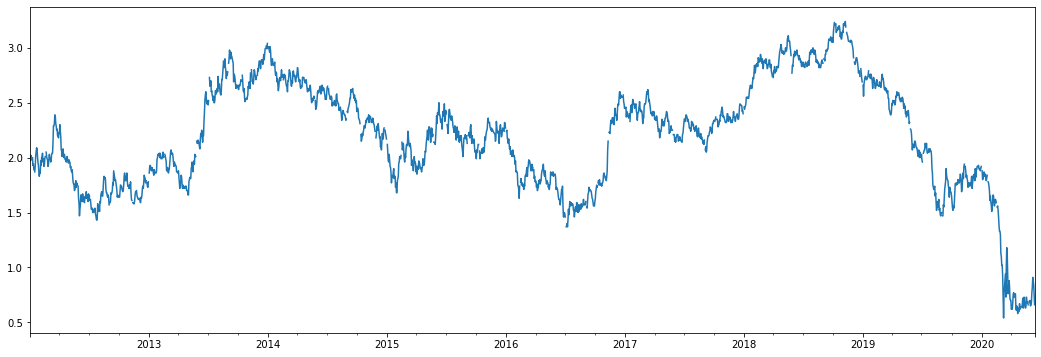

In [25]:
final_data['10 year'].plot(figsize = (18,6))

### lets prep out data for training

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
import seaborn as sns

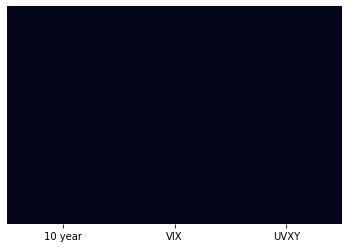

In [32]:
sns.heatmap(final_data.isnull(), yticklabels=False, cbar=False)

In [33]:
final_data.dropna(inplace=True)

In [82]:
X = final_data.drop("10 year", axis=1).values
y = final_data["10 year"].values

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Scaling the data

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scalar = MinMaxScaler()

In [86]:
X_train = scalar.fit_transform(X_train)

In [87]:
X_test= scalar.transform(X_test)

### Early Stopping

In [88]:
from tensorflow.keras.callbacks import EarlyStopping

In [89]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=150)

### Setting up model

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [91]:
model = Sequential()
model.add(Dense(units =200, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units =180, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units =150, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units =100, activation = "relu"))
model.add(Dense(units = 1))
model.compile(optimizer = "adam", loss = "mse")

## fitting model

In [92]:
model.fit(X_train, y_train,validation_data=(X_test,y_test), callbacks=[stop], epochs=700)

Train on 1476 samples, validate on 633 samples
Epoch 1/700
1476/1476 [==============================] - 3s 2ms/sample - loss: 1.6678 - val_loss: 0.3466
Epoch 2/700
1476/1476 [==============================] - 1s 654us/sample - loss: 0.4253 - val_loss: 0.2331
Epoch 3/700
1476/1476 [==============================] - 1s 607us/sample - loss: 0.3127 - val_loss: 0.2097
Epoch 4/700
1476/1476 [==============================] - 1s 604us/sample - loss: 0.2841 - val_loss: 0.2044
Epoch 5/700
1476/1476 [==============================] - 1s 608us/sample - loss: 0.2790 - val_loss: 0.2027
Epoch 6/700
1476/1476 [==============================] - 1s 610us/sample - loss: 0.2652 - val_loss: 0.2041
Epoch 7/700
1476/1476 [==============================] - 1s 618us/sample - loss: 0.2605 - val_loss: 0.2003
Epoch 8/700
1476/1476 [==============================] - 1s 606us/sample - loss: 0.2559 - val_loss: 0.1949
Epoch 9/700
1476/1476 [==============================] - 1s 610us/sample - loss: 0.2346 - val_loss:

1476/1476 [==============================] - 1s 608us/sample - loss: 0.1782 - val_loss: 0.1777
Epoch 77/700
1476/1476 [==============================] - 1s 625us/sample - loss: 0.1775 - val_loss: 0.1823
Epoch 78/700
1476/1476 [==============================] - 1s 607us/sample - loss: 0.1782 - val_loss: 0.1789
Epoch 79/700
1476/1476 [==============================] - 1s 605us/sample - loss: 0.1826 - val_loss: 0.1793
Epoch 80/700
1476/1476 [==============================] - 1s 607us/sample - loss: 0.1769 - val_loss: 0.1761
Epoch 81/700
1476/1476 [==============================] - 1s 605us/sample - loss: 0.1776 - val_loss: 0.1818
Epoch 82/700
1476/1476 [==============================] - 1s 600us/sample - loss: 0.1775 - val_loss: 0.1807
Epoch 83/700
1476/1476 [==============================] - 1s 607us/sample - loss: 0.1783 - val_loss: 0.1866
Epoch 84/700
1476/1476 [==============================] - 1s 604us/sample - loss: 0.1751 - val_loss: 0.1765
Epoch 85/700
1476/1476 [=================

1476/1476 [==============================] - 1s 602us/sample - loss: 0.1741 - val_loss: 0.1759
Epoch 152/700
1476/1476 [==============================] - 1s 606us/sample - loss: 0.1749 - val_loss: 0.1759
Epoch 153/700
1476/1476 [==============================] - 1s 598us/sample - loss: 0.1764 - val_loss: 0.1797
Epoch 154/700
1476/1476 [==============================] - 1s 605us/sample - loss: 0.1762 - val_loss: 0.1793
Epoch 155/700
1476/1476 [==============================] - 1s 600us/sample - loss: 0.1732 - val_loss: 0.1752
Epoch 156/700
1476/1476 [==============================] - 1s 596us/sample - loss: 0.1721 - val_loss: 0.1769
Epoch 157/700
1476/1476 [==============================] - 1s 607us/sample - loss: 0.1778 - val_loss: 0.1767
Epoch 158/700
1476/1476 [==============================] - 1s 613us/sample - loss: 0.1712 - val_loss: 0.1732
Epoch 159/700
1476/1476 [==============================] - 1s 607us/sample - loss: 0.1725 - val_loss: 0.1801
Epoch 160/700
1476/1476 [========

1476/1476 [==============================] - 1s 605us/sample - loss: 0.1745 - val_loss: 0.1723
Epoch 227/700
1476/1476 [==============================] - 1s 601us/sample - loss: 0.1700 - val_loss: 0.1758
Epoch 228/700
1476/1476 [==============================] - 1s 609us/sample - loss: 0.1748 - val_loss: 0.1762
Epoch 229/700
1476/1476 [==============================] - 1s 607us/sample - loss: 0.1737 - val_loss: 0.1703
Epoch 230/700
1476/1476 [==============================] - 1s 606us/sample - loss: 0.1719 - val_loss: 0.1706
Epoch 231/700
1476/1476 [==============================] - 1s 618us/sample - loss: 0.1703 - val_loss: 0.1713
Epoch 232/700
1476/1476 [==============================] - 1s 606us/sample - loss: 0.1696 - val_loss: 0.1714
Epoch 233/700
1476/1476 [==============================] - 1s 611us/sample - loss: 0.1718 - val_loss: 0.1697
Epoch 234/700
1476/1476 [==============================] - 1s 609us/sample - loss: 0.1716 - val_loss: 0.1709
Epoch 235/700
1476/1476 [========

1476/1476 [==============================] - 1s 646us/sample - loss: 0.1705 - val_loss: 0.1759
Epoch 302/700
1476/1476 [==============================] - 1s 632us/sample - loss: 0.1736 - val_loss: 0.1744
Epoch 303/700
1476/1476 [==============================] - 1s 628us/sample - loss: 0.1729 - val_loss: 0.1741
Epoch 304/700
1476/1476 [==============================] - 1s 625us/sample - loss: 0.1689 - val_loss: 0.1736
Epoch 305/700
1476/1476 [==============================] - 1s 602us/sample - loss: 0.1691 - val_loss: 0.1733
Epoch 306/700
1476/1476 [==============================] - 1s 609us/sample - loss: 0.1705 - val_loss: 0.1757
Epoch 307/700
1476/1476 [==============================] - 1s 624us/sample - loss: 0.1690 - val_loss: 0.1719
Epoch 308/700
1476/1476 [==============================] - 1s 610us/sample - loss: 0.1694 - val_loss: 0.1701
Epoch 309/700
1476/1476 [==============================] - 1s 609us/sample - loss: 0.1725 - val_loss: 0.1760
Epoch 310/700
1476/1476 [========

1476/1476 [==============================] - 1s 602us/sample - loss: 0.1715 - val_loss: 0.1759
Epoch 377/700
1476/1476 [==============================] - 1s 604us/sample - loss: 0.1708 - val_loss: 0.1775
Epoch 378/700
1476/1476 [==============================] - 1s 613us/sample - loss: 0.1713 - val_loss: 0.1731
Epoch 379/700
1476/1476 [==============================] - 1s 607us/sample - loss: 0.1706 - val_loss: 0.1770
Epoch 380/700
1476/1476 [==============================] - 1s 594us/sample - loss: 0.1703 - val_loss: 0.1715
Epoch 381/700
1476/1476 [==============================] - 1s 613us/sample - loss: 0.1778 - val_loss: 0.1724
Epoch 382/700
1476/1476 [==============================] - 1s 615us/sample - loss: 0.1726 - val_loss: 0.1732
Epoch 383/700
1476/1476 [==============================] - 1s 604us/sample - loss: 0.1710 - val_loss: 0.1712
Epoch 384/700
1476/1476 [==============================] - 1s 601us/sample - loss: 0.1723 - val_loss: 0.1721
Epoch 385/700
1476/1476 [========

1476/1476 [==============================] - 1s 596us/sample - loss: 0.1687 - val_loss: 0.1751
Epoch 452/700
1476/1476 [==============================] - 1s 598us/sample - loss: 0.1732 - val_loss: 0.1717
Epoch 453/700
1476/1476 [==============================] - 1s 596us/sample - loss: 0.1711 - val_loss: 0.1726
Epoch 454/700
1476/1476 [==============================] - 1s 591us/sample - loss: 0.1746 - val_loss: 0.1707
Epoch 455/700
1476/1476 [==============================] - 1s 595us/sample - loss: 0.1717 - val_loss: 0.1744
Epoch 456/700
1476/1476 [==============================] - 1s 596us/sample - loss: 0.1721 - val_loss: 0.1749
Epoch 457/700
1476/1476 [==============================] - 1s 596us/sample - loss: 0.1698 - val_loss: 0.1764
Epoch 458/700
1476/1476 [==============================] - 1s 584us/sample - loss: 0.1707 - val_loss: 0.1716
Epoch 459/700
1476/1476 [==============================] - 1s 606us/sample - loss: 0.1708 - val_loss: 0.1729
Epoch 460/700
1476/1476 [========

1476/1476 [==============================] - 1s 591us/sample - loss: 0.1716 - val_loss: 0.1752
Epoch 527/700
1476/1476 [==============================] - 1s 594us/sample - loss: 0.1717 - val_loss: 0.1706
Epoch 528/700
1476/1476 [==============================] - 1s 599us/sample - loss: 0.1676 - val_loss: 0.1692
Epoch 529/700
1476/1476 [==============================] - 1s 588us/sample - loss: 0.1688 - val_loss: 0.1720
Epoch 530/700
1476/1476 [==============================] - 1s 593us/sample - loss: 0.1676 - val_loss: 0.1704
Epoch 531/700
1476/1476 [==============================] - 1s 603us/sample - loss: 0.1715 - val_loss: 0.1806
Epoch 532/700
1476/1476 [==============================] - 1s 599us/sample - loss: 0.1674 - val_loss: 0.1700
Epoch 533/700
1476/1476 [==============================] - 1s 598us/sample - loss: 0.1651 - val_loss: 0.1706
Epoch 534/700
1476/1476 [==============================] - 1s 596us/sample - loss: 0.1740 - val_loss: 0.1735
Epoch 535/700
1476/1476 [========

1476/1476 [==============================] - 1s 609us/sample - loss: 0.1703 - val_loss: 0.1742
Epoch 602/700
1476/1476 [==============================] - 1s 606us/sample - loss: 0.1686 - val_loss: 0.1696
Epoch 603/700
1476/1476 [==============================] - 1s 608us/sample - loss: 0.1682 - val_loss: 0.1763
Epoch 604/700
1476/1476 [==============================] - 1s 630us/sample - loss: 0.1709 - val_loss: 0.1744
Epoch 605/700
1476/1476 [==============================] - 1s 602us/sample - loss: 0.1717 - val_loss: 0.1734
Epoch 606/700
1476/1476 [==============================] - 1s 605us/sample - loss: 0.1696 - val_loss: 0.1739
Epoch 607/700
1476/1476 [==============================] - 1s 618us/sample - loss: 0.1683 - val_loss: 0.1686
Epoch 608/700
1476/1476 [==============================] - 1s 633us/sample - loss: 0.1705 - val_loss: 0.1733
Epoch 609/700
1476/1476 [==============================] - 1s 601us/sample - loss: 0.1687 - val_loss: 0.1714
Epoch 610/700
1476/1476 [========

1476/1476 [==============================] - 1s 608us/sample - loss: 0.1669 - val_loss: 0.1684
Epoch 677/700
1476/1476 [==============================] - 1s 604us/sample - loss: 0.1688 - val_loss: 0.1685
Epoch 678/700
1476/1476 [==============================] - 1s 603us/sample - loss: 0.1676 - val_loss: 0.1686
Epoch 679/700
1476/1476 [==============================] - 1s 597us/sample - loss: 0.1677 - val_loss: 0.1667
Epoch 680/700
1476/1476 [==============================] - 1s 596us/sample - loss: 0.1709 - val_loss: 0.1679
Epoch 681/700
1476/1476 [==============================] - 1s 601us/sample - loss: 0.1676 - val_loss: 0.1670
Epoch 682/700
1476/1476 [==============================] - 1s 599us/sample - loss: 0.1682 - val_loss: 0.1692
Epoch 683/700
1476/1476 [==============================] - 1s 599us/sample - loss: 0.1691 - val_loss: 0.1689
Epoch 684/700
1476/1476 [==============================] - 1s 608us/sample - loss: 0.1715 - val_loss: 0.1685
Epoch 685/700
1476/1476 [========

### Evauating the model
- The history of training already shows the the network has a high preditictive capability when training. Validating the theory we proposed

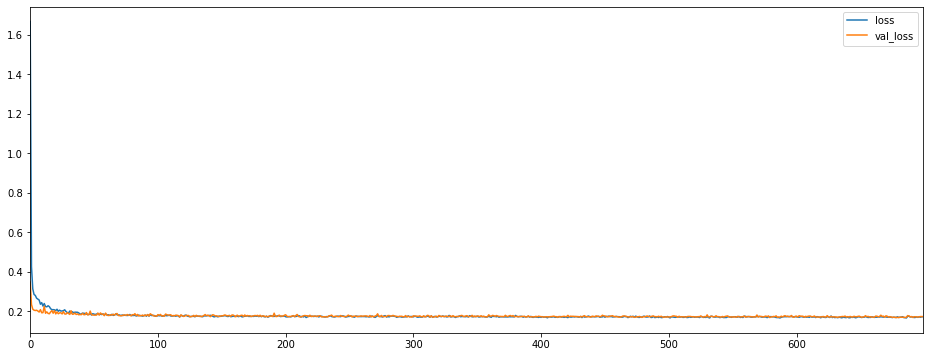

In [93]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

### Predicitons

In [94]:
predictions = model.predict(X_test)

### Metrics 

In [95]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error

In [96]:
explained_variance_score(y_test, predictions)

0.335335804812706

In [97]:
mean_absolute_error(y_test, predictions)

0.3222292819859292

In [98]:
mean_squared_error(y_test, predictions)

0.17172637960084944

### Random Predictions

In [123]:
from random import randint
random_index = randint(1, len(final_data))
random_day = final_data.drop("10 year", axis=1).iloc[random_index]

In [124]:
random_day

VIX        15.16
UVXY    70750.00
Name: 2014-10-03 00:00:00, dtype: float64

### We willl need to scale reshape and get the values of the random day. Since out model was trained as such

In [125]:
X_train.shape

(1476, 2)

In [126]:
new_day = scalar.transform(random_day.values.reshape(1,2))

In [127]:
model.predict(new_day)

array([[2.2950406]], dtype=float32)

## Actual Value

In [128]:
final_data.iloc[random_index]["10 year"]

2.45